In [ ]:
begin
    using Pkg
    Pkgs = ["CSV", "DataFrames", "Ipopt", "JuMP", "PowerModels"]
    for p in Pkgs
        if Base.find_package(p) == nothing
            Pkg.add(p)
        end
    end
    using CSV, DataFrames, Ipopt, JuMP, PowerModels
end

#  Optimal Power Flow Computer Lab
## Formulate OPF in JuMP and solve it
* We are formulating Power Flow Equations in a different way, comparing the previous computer lab
## Formulate P-SC-OPF in JuMP and solve it

![6-bus.jpg](6-bus.jpg)

# Data

 Let us read the data that describes the system in Fig.1:
 > 1. Bus data 
 > 2. Branch data 
 > 3. Generation data
 > 4. Line data (S)

In [ ]:
# Read data, as usual

## Let us see what Santa brought us

## Cost function:

$$
c(p_g) = c_{g, 2} p_g^2 + c_{g, 1} p_g + c_{g, 0} p_g
$$

# OPF
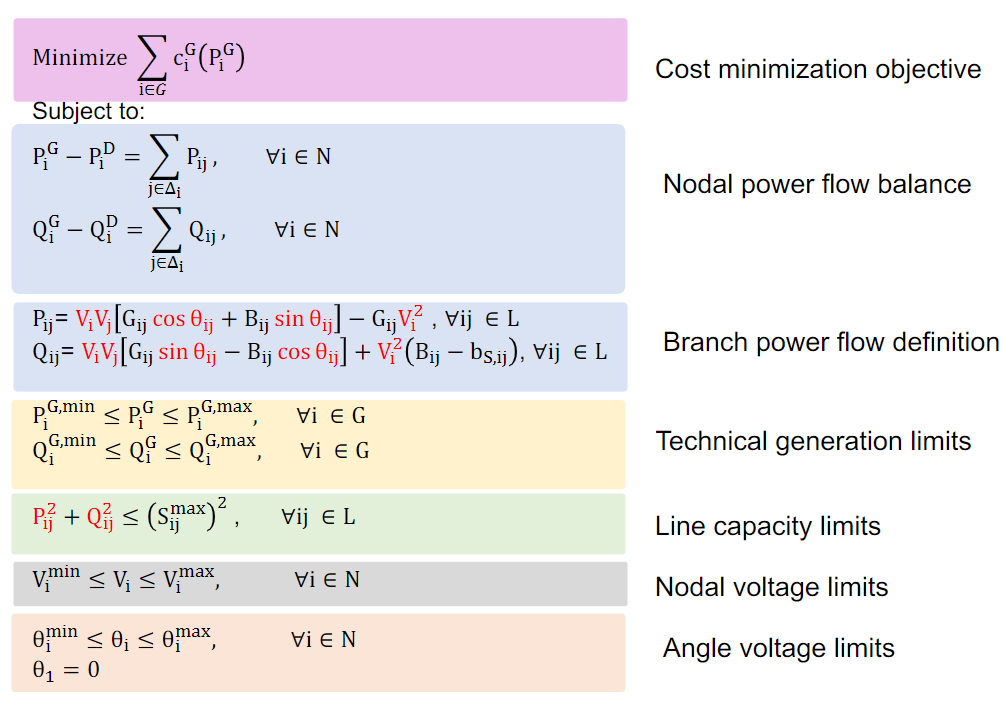

In [ ]:
function OPF(G, B, b, S, BusData, GenData, Gens, Buses)
    """
    This function creates a JuMP model for Optimal Power Flow (OPF) problem with provided parameters of power grid
    
    Arguments:
        G (Matrix{Real})        : conductance matrix of grid -- real part of admittance matrix
        B (Matrix{Real})        : susceptance matrix of grid -- imaginary part of admittance matrix
        b (Matrix{Float64})     : shunt matrix for lines
        S (Matrix{Float64})     : line flow limits matrix
        BusData (DataFrame)     : contains information on buses: power demands and voltage magnitude limits
        GenData (DataFrame)     : contains information on generators: generation limits and quadratic cost function's coefficients
        Gens (UnitRange{Int64}) : indices of generators
        Buses (UnitRange{Int64}): indices of buses
    Returns:
        
    """
    
    m = Model(with_optimizer(Ipopt.Optimizer))
    
    # Variables
    ## Voltages
    
    ## Power generations
    
    ## Power flows
    ## Notice! here we start out power flow equations from Line Flows, not Injections!
    
    
    
    #Constraints
    
    ## Power flow through lines
    
    ## Nodal balance: much easier!
    
    ### Pay attention to this strange sum: common thing in matpower .m cases
    
    ## But... in lecture we had the formulation P^G - P^D = A Pl, why not to use that?
    ## Line limits
    
    
    ## Phase angle difference: in a different way
    
    
    # Objective
    
    
    # Solve
    
    
    return m
end

## Let us see what it yielded
> Before, check if it succeeded

In [ ]:
# Power generation


In [ ]:
# lines


In [ ]:
# constraint

In [ ]:
# objective

# P-SC-OPF

Let us read the contingencies of interest from file:

## Contingency tensor
Next, we create contingency tensor, that represents the current active elements of the grid, specifically, lines

Wait... what is tensor?

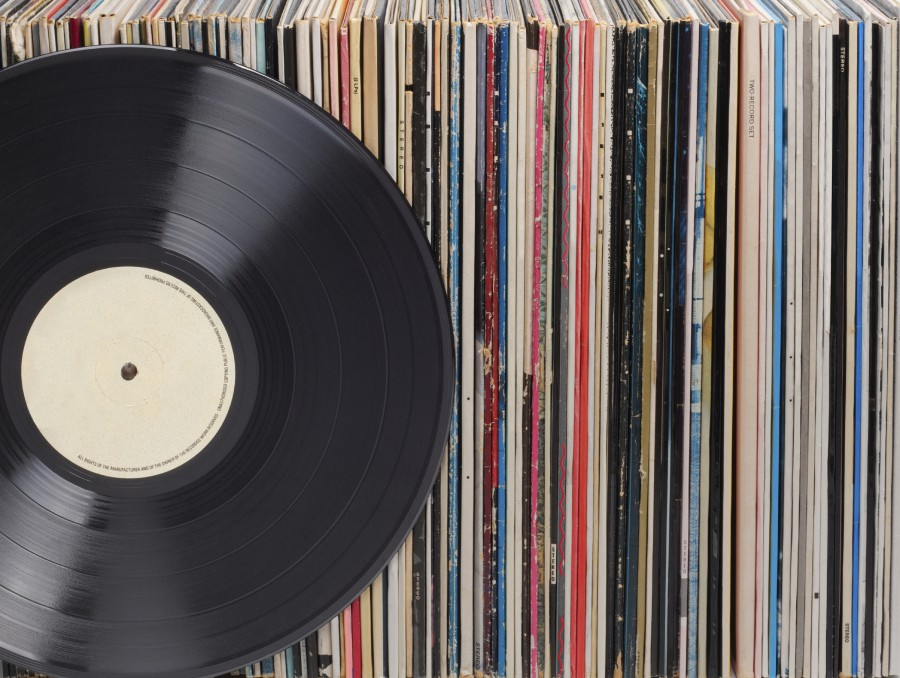

In [ ]:
#index set for contingencies
 #+1 comes from zero contingency - everything is working
# the tensor itself


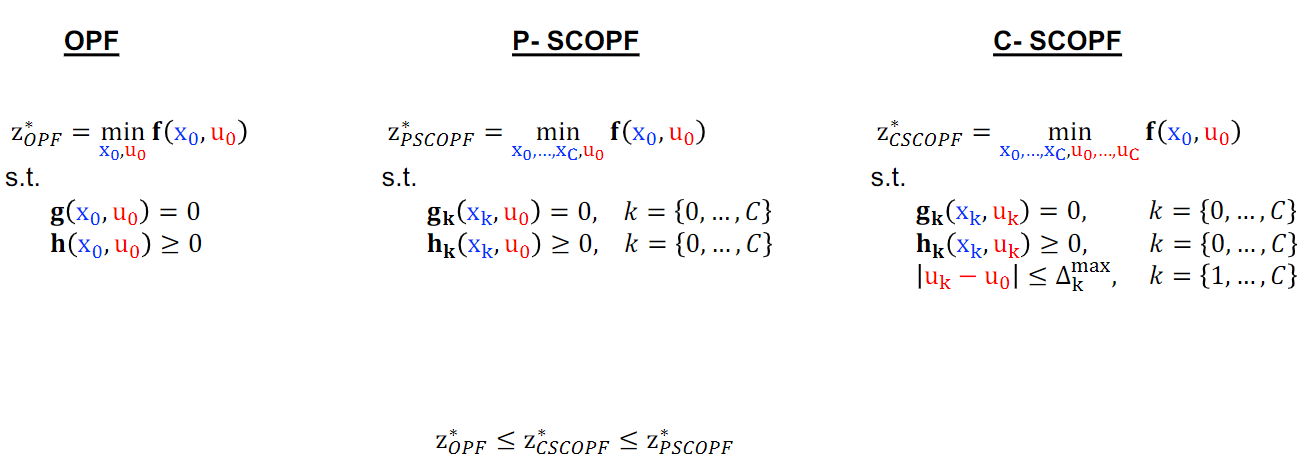

In [ ]:
function PSCOPF(G, B, b, S, BusData, GenData, A, Gens, Buses, K)
    """
    This function creates a JuMP model for Preventive Security Constrained Optimal Power Flow (P-SC-OPF) problem 
        with provided parameters of power grid
    
    Arguments:
        G (Matrix{Real})        : conductance matrix of grid -- real part of admittance matrix
        B (Matrix{Real})        : susceptance matrix of grid -- imaginary part of admittance matrix
        b (Matrix{Float64})     : shunt matrix for lines
        S (Matrix{Float64})     : line flow limits matrix
        BusData (DataFrame)     : contains information on buses: power demands and voltage magnitude limits
        GenData (DataFrame)     : contains information on generators: generation limits and quadratic cost function's coefficients
        A (Array{Float64, 3})   : contingency scenarios for lines
        Gens (UnitRange{Int64}) : indices of generators
        Buses (UnitRange{Int64}): indices of buses
        K (UnitRange{Int64})    : indices of contingencies' scenarios
    Returns:
        
    """
    
    m = Model(with_optimizer(Ipopt.Optimizer))
    
    # Variables
    ## Voltages
    
    ## Power generations
    
    ## Power flows
    ## Notice! here we start out power flow equations from Line Flows, not Injections!
    
    
    #Constraints
    
    ## Power flow through lines
    
    ## Nodal balance: much easier!
    ### Pay attention to this strange sum: common thing in matpower .m cases
    
    ## Line limits
    
    
    # Objective
    
    
    # Solve
    
    
    return m
end

# PowerModels.jl

https://lanl-ansi.github.io/PowerModels.jl/stable/quickguide/